<a id='top'></a>
### Table of contents

1. Importing Visualization Libraries and Data

2. [Merging the data](#merge)

- [Merging food prices, population, and number of undernourished people data](#food_undernourished)
- [Merging food prices and average earning data](#earnings)
- [Merging food prices and inflation data](#inflation)
- [Merging food prices and gdp per capita data](#gdp)


In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import pearsonr
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from pylab import rcParams
import matplotlib.ticker as mt
from matplotlib.ticker import ScalarFormatter
from fuzzywuzzy import process, fuzz
from datetime import date
from datetime import datetime

In [2]:
%matplotlib inline
rcParams['figure.figsize']=14,7
sns.set_style('whitegrid')

In [3]:
path=r'C:\Users\frauz\Documents\Python Projects\Final Project\Data\Data Prepared' #creating a path
path1=r'C:\Users\frauz\Documents\Python Projects\Final Project\Data' #creating a path

<a id='merge'></a>
# Merging the data

[Back to top](#top)

<a id='merge'></a>
### Merging food prices, population, and number of undernourished people data

[Back to top](#top)

In [4]:
# Importing population and nr. of undernourished people

df_under= pd.read_pickle(os.path.join(path,'population_undernourished.pkl'))

# Converting the dataframe into csv

df_under.to_csv(os.path.join(path,'population_undernourished.csv'))

In [5]:
df_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4452 entries, 0 to 4451
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  4452 non-null   object 
 1   iso                      4452 non-null   object 
 2   year                     4452 non-null   int32  
 3   population               4452 non-null   float64
 4   millions_undernourished  2530 non-null   float64
dtypes: float64(2), int32(1), object(2)
memory usage: 191.3+ KB


In [6]:
df_under.head() 

,country,iso,year,population,millions_undernourished
0,Afghanistan,AFG,2001,19688632.0,9.3
1,Afghanistan,AFG,2002,21000256.0,9.3
2,Afghanistan,AFG,2003,22645130.0,8.7
3,Afghanistan,AFG,2004,23553551.0,8.6
4,Afghanistan,AFG,2005,24411191.0,8.5


In [7]:
df_under.describe() #basic statistics

,year,population,millions_undernourished
count,4452.000000,4.452000e+03,2530.000000
mean,2011.000000,3.313633e+07,5.050514
std,6.055981,1.307865e+08,19.308644
min,2001.000000,9.609000e+03,0.100000
25%,2006.000000,7.507765e+05,0.200000
50%,2011.000000,5.931242e+06,1.300000
75%,2016.000000,2.147950e+07,3.800000
max,2021.000000,1.412360e+09,249.600000


In [8]:
df_under['country'].nunique() #Number of countries

212

In [9]:
df_under['year'].nunique() #Number of years

21

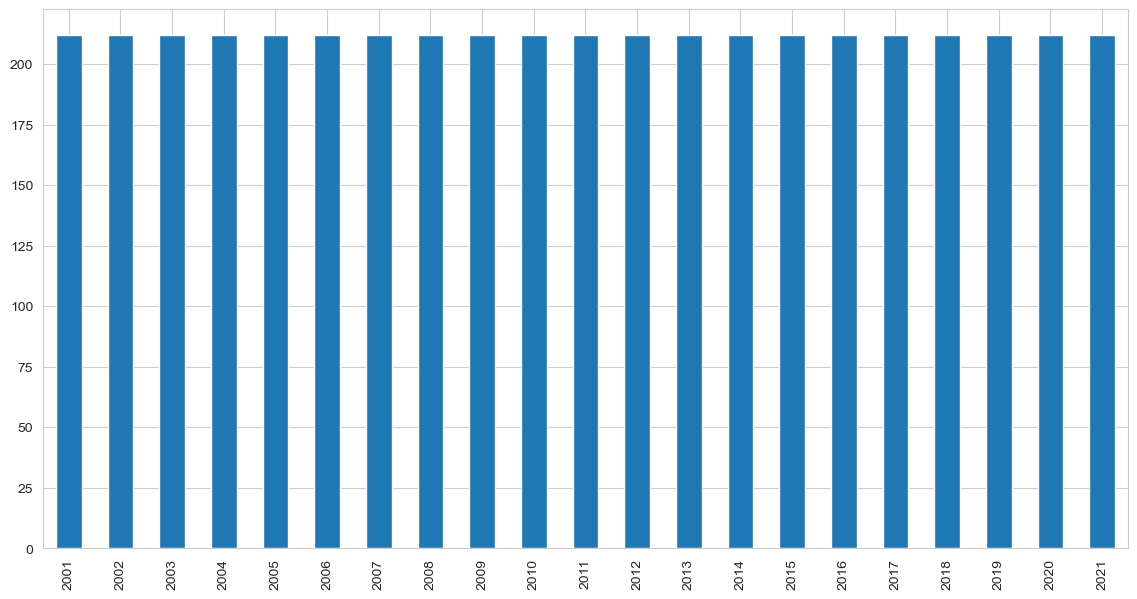

In [10]:
# Checking year dictribution

year_dist=df_under['year'].value_counts().sort_index().plot(kind='bar')

In [11]:
#Final check of country names

set_missmatched=set(df_under['country'].unique())
set_missmatched

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China, Taiwan Province of',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 

<a id='food_undernourished'></a>
## Merging food prices, population, and number of undernourished people data

[Back to top](#top)

In [12]:
#Importing data

df_food=pd.read_pickle(os.path.join(path, 'food_prices_market_cap_noncap.pkl'))

In [13]:
df_food.head()

,iso,date,currency,capital_market,product_name,price_unit,usdprice_unit
0,AFG,2000-01-15,AFN,capital,Bread,14.260000,0.304800
1,AFG,2000-01-15,AFN,capital,Wheat,13.750000,0.293900
2,AFG,2000-01-15,AFN,capital,Wheat flour,18.570000,0.396900
3,AFG,2000-01-15,AFN,non_capital,Bread,15.580000,0.332967
4,AFG,2000-01-15,AFN,non_capital,Wheat,11.723333,0.250567


In [14]:
df_food['iso'].unique()

array(['AFG', 'AGO', 'ARG', 'ARM', 'AZE', 'BDI', 'BEN', 'BFA', 'BGD',
       'BLR', 'BOL', 'BTN', 'CAF', 'CIV', 'CMR', 'COD', 'COG', 'CPV',
       'DJI', 'DOM', 'DZA', 'EGY', 'ERI', 'ETH', 'FJI', 'GAB', 'GEO',
       'GHA', 'GIN', 'GMB', 'GNB', 'GTM', 'HTI', 'IDN', 'IND', 'IRN',
       'IRQ', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'LAO', 'LBN',
       'LBR', 'LBY', 'LKA', 'LSO', 'MDA', 'MDG', 'MEX', 'MLI', 'MMR',
       'MNG', 'MOZ', 'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'NIC', 'NPL',
       'PAK', 'PAN', 'PER', 'PHL', 'PSE', 'RWA', 'SDN', 'SEN', 'SLE',
       'SLV', 'SOM', 'SSD', 'SWZ', 'SYR', 'TCD', 'TGO', 'TJK', 'TLS',
       'TUR', 'TZA', 'UGA', 'UKR', 'YEM', 'ZMB', 'ZWE'], dtype=object)

In [15]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193836 entries, 0 to 193835
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   iso             193836 non-null  object        
 1   date            193836 non-null  datetime64[ns]
 2   currency        193836 non-null  object        
 3   capital_market  193836 non-null  object        
 4   product_name    193836 non-null  object        
 5   price_unit      193836 non-null  float64       
 6   usdprice_unit   193836 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 10.4+ MB


In [16]:
df_food['year']=df_food['date'].dt.strftime('%Y')

df_food['year']=df_food['year'].astype('int')
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193836 entries, 0 to 193835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   iso             193836 non-null  object        
 1   date            193836 non-null  datetime64[ns]
 2   currency        193836 non-null  object        
 3   capital_market  193836 non-null  object        
 4   product_name    193836 non-null  object        
 5   price_unit      193836 non-null  float64       
 6   usdprice_unit   193836 non-null  float64       
 7   year            193836 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 11.1+ MB


In [17]:
# Merging the data

df_food_un=pd.merge(df_food, df_under[['iso','year','population','millions_undernourished']], how='left', on=['iso', 'year'], sort=True, indicator=True)

In [18]:
df_food_un.head()

,iso,date,currency,capital_market,product_name,price_unit,usdprice_unit,year,population,millions_undernourished,_merge
0,AFG,2000-01-15,AFN,capital,Bread,14.260000,0.304800,2000,NaN,NaN,left_only
1,AFG,2000-01-15,AFN,capital,Wheat,13.750000,0.293900,2000,NaN,NaN,left_only
2,AFG,2000-01-15,AFN,capital,Wheat flour,18.570000,0.396900,2000,NaN,NaN,left_only
3,AFG,2000-01-15,AFN,non_capital,Bread,15.580000,0.332967,2000,NaN,NaN,left_only
4,AFG,2000-01-15,AFN,non_capital,Wheat,11.723333,0.250567,2000,NaN,NaN,left_only


In [19]:
df_food_un.shape

(193836, 11)

In [20]:
df_food_un['_merge'].value_counts()

both          161482
left_only      32354
right_only         0
Name: _merge, dtype: int64

In [21]:
df_food_un.isnull().sum()

iso                            0
date                           0
currency                       0
capital_market                 0
product_name                   0
price_unit                     0
usdprice_unit                  0
year                           0
population                 32354
millions_undernourished    58787
_merge                         0
dtype: int64

In [22]:
# Dropping the 'merge' 

df_food_un.drop(columns=['_merge'], inplace=True)

In [23]:
# I want to import country names from another data set. First I import the data set

df_inflation=pd.read_pickle(os.path.join(path, 'inflation.pkl')) 

country_dict=dict(zip(df_inflation['iso'], df_inflation['country']))

# Populating the new country_name column using .map function and a dictionary

df_food_un['country']=df_food_un['iso'].map(country_dict)

df_food_un['country'].isnull().sum() #How many records still don't have the full country name

0

In [24]:
df_food_un.shape

(193836, 11)

<a id='earnings'></a>
## Merging food prices and average earning data

[Back to top](#top)

In [25]:
#Importing data
df_earnings=pd.read_pickle(os.path.join(path,'average_earning_prepared.pkl'))

In [26]:
df_earnings.tail(10)

,country,year,avg_earning_LC
3074,Zimbabwe,1979,175.00
3075,Zimbabwe,1978,156.67
3076,Zimbabwe,1977,149.17
3077,Zimbabwe,1976,129.17
3078,Zimbabwe,1975,115.83
3079,Zimbabwe,1974,94.17
3080,Zimbabwe,1973,92.50
3081,Zimbabwe,1972,86.67
3082,Zimbabwe,1971,81.67
3083,Zimbabwe,1970,75.83


In [27]:
# Comparing country names in average earning and food data sets

country_earn=set(df_earnings['country'].to_list())
country_food=set(df_food_un['country'].to_list())

In [28]:

# Finding all missmatched values and creating a series with them

country_missing=np.sort(np.array(list(country_earn.union(country_food)-set(country_earn).intersection(country_food))))
country_missing

array(['Albania', 'Algeria', 'Andorra', 'Aruba', 'Australia', 'Austria',
       'Bahrain', 'Barbados', 'Belgium', 'Belize', 'Bermuda',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Congo, Dem. Rep.',
       'Congo, Democratic Republic of the', 'Congo, Rep.', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czechia', "Côte d'Ivoire", 'Denmark', 'Ecuador',
       'Egypt', 'Egypt, Arab Rep.', 'Eritrea', 'Estonia',
       'Falkland Islands (Malvinas)', 'Finland', 'France', 'Gabon',
       'Gambia', 'Gambia, The', 'Germany', 'Gibraltar', 'Greece', 'Guam',
       'Guernsey', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong, China', 'Hungary', 'Iceland', 'Iran, Islamic Rep.',
       'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jamaica', 

In [29]:
# Using a data set with matched country names that I created before, I can try to unify names in both data sets

final_country_names=pd.read_pickle(os.path.join(path, 'country_names_matched.pkl'))

df_earn_new=df_earnings.merge(final_country_names[['country_name',
                                               'matched_country']], how='left', left_on='country', right_on='country_name')

df_earn_new[df_earn_new['country'].str.contains('Lao')]

,country,year,avg_earning_LC,country_name,matched_country
1697,Lao People's Democratic Republic,2017,1977052.52,Lao People's Democratic Republic,Lao PDR
1698,Lao People's Democratic Republic,2010,1111897.62,Lao People's Democratic Republic,Lao PDR


In [30]:
df_earn_new['matched_country'].unique()

array([nan, 'Bolivia (Plurinational State of)',
       'China, Taiwan Province of', "Cote d'Ivoire", 'Congo, Rep.',
       'Curacao', 'Egypt, Arab Rep.',
       'United Kingdom of Great Britain and Northern Ireland',
       'Gambia, The', 'Kyrgyz Republic', 'Lao PDR',
       'Netherlands (Kingdom of the)', 'Slovak Republic', 'Turkiye',
       'United States of America', 'Vietnam', 'Yemen, Rep.'], dtype=object)

In [31]:
# Replacing country names with matched names if these names are in food price data


df_earn_new.loc[(df_earn_new['matched_country'].notnull())&
                (df_earn_new['matched_country'].isin(list(country_food))),'country']=df_earn_new['matched_country']


In [32]:
df_earn_new['country'].unique() # checking if countries were replaced with matched names

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Netherlands Antilles', 'United Arab Emirates', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Burundi',
       'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria',
       'Bahrain', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
       'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam',
       'Bhutan', 'Botswana', 'Canada', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Democratic Republic of the',
       'Congo, Rep.', 'Cook Islands', 'Colombia', 'Comoros', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Germany',
       'Djibouti', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'Falkland Islands (Malvinas)', 'France', 'United Kingdom',
       'Georgia', 'Guernsey', 'Ghana', 'Gibraltar', 'Gambia, The',
       'Guinea-Bissau', 'Greec

In [33]:
# Check what countries are still missmatched

country_earn_new=set(df_earn_new['country'].unique())
country_still_missing=np.sort(np.array(list(country_earn_new.union(country_food)-set(country_earn_new).intersection(country_food))))
country_still_missing

array(['Albania', 'Algeria', 'Andorra', 'Aruba', 'Australia', 'Austria',
       'Bahrain', 'Barbados', 'Belgium', 'Belize', 'Bermuda',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Democratic Republic of the',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Eritrea', 'Estonia',
       'Falkland Islands (Malvinas)', 'Finland', 'France', 'Gabon',
       'Germany', 'Gibraltar', 'Greece', 'Guam', 'Guernsey', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong, China', 'Hungary',
       'Iceland', 'Iran, Islamic Rep.', 'Iran, Islamic Republic of',
       'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica',
       'Jersey', 'Kiribati', 'Korea, Republic of', 'Kosovo', 'Kuwait',
       'Latvia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxem

In [34]:
len(country_still_missing)

128

In [35]:
# There are 4 countries that weren't matched using the previously matched names because they are different from both versions

df_earn_new.loc[df_earn_new['country']=='Congo, Democratic Republic of the', 'country']='Congo, Dem. Rep.'
df_earn_new.loc[df_earn_new['country']=='Iran, Islamic Republic of', 'country']='Iran, Islamic Rep.'
df_earn_new.loc[df_earn_new['country']=='Moldova, Republic of', 'country']='Moldova'
df_earn_new.loc[df_earn_new['country']=='Tanzania, United Republic of', 'country']='Tanzania'

In [36]:
df_earn_new.shape

(3084, 5)

In [37]:
# Merging food prices and earnings data

df_food_un_earn=pd.merge(df_food_un, df_earn_new[['country','year','avg_earning_LC']], on=['country','year'], how='left', sort=True)

In [38]:
df_food_un_earn.tail()

,iso,date,currency,capital_market,product_name,price_unit,usdprice_unit,year,population,millions_undernourished,country,avg_earning_LC
193831,ZWE,2023-01-15,USD,non_capital,Maize meal,0.585700,0.585700,2023,NaN,NaN,Zimbabwe,NaN
193832,ZWE,2023-01-15,USD,non_capital,Oil,2.613533,2.613533,2023,NaN,NaN,Zimbabwe,NaN
193833,ZWE,2023-01-15,USD,non_capital,Rice,1.242900,1.242900,2023,NaN,NaN,Zimbabwe,NaN
193834,ZWE,2023-01-15,USD,non_capital,Salt,0.659433,0.659433,2023,NaN,NaN,Zimbabwe,NaN
193835,ZWE,2023-01-15,USD,non_capital,Sugar,1.301100,1.301100,2023,NaN,NaN,Zimbabwe,NaN


In [39]:
df_food_un_earn.shape

(193836, 12)

In [40]:
# Checking how many countries have prices recorded in USD instead of local currency

df_food_un_earn[['country','currency']][df_food_un_earn['currency']=='USD'].value_counts()

country      currency
Nicaragua    USD         3437
Timor-Leste  USD         1524
Malawi       USD         1366
Zimbabwe     USD          868
El Salvador  USD          788
dtype: int64

In [41]:
# How many of those have average earnings data

df_food_un_earn[['country',
                 'currency',
                 'year',
                 'avg_earning_LC']][(df_food_un_earn['currency']=='USD')&(df_food_un_earn['avg_earning_LC'].notna())].value_counts()

# In most countries, salaries are already recorded in USD. I need to recalculate Nicaragua, 2013 in Malawi. as well as 2022 and 2021 in Zimbabwe

country      currency  year  avg_earning_LC
Nicaragua    USD       2014  9897.55           457
Timor-Leste  USD       2021  257.59            356
Nicaragua    USD       2013  7463.00           336
Zimbabwe     USD       2021  13935.05          146
Malawi       USD       2013  21062.00          105
Zimbabwe     USD       2015  763.58             99
                       2022  132948.34          96
Nicaragua    USD       2012  4449.92            63
Timor-Leste  USD       2016  340.37             60
                       2013  412.77             49
El Salvador  USD       2017  317.93             48
                       2018  331.77             48
                       2016  296.83             48
                       2010  272.15             48
                       2015  305.66             48
                       2014  301.60             48
                       2013  295.73             48
                       2012  281.37             48
                       2011  272.85   

In [42]:
df_food_un_earn[(df_food_un_earn['country']=='Timor-Leste')&
               (df_food_un_earn['avg_earning_LC'].notnull())&
               (df_food_un_earn['year']==2001)] 

#Timor-Leste already has all of the earning data in USD. Originally, only in 2001 the data was imputed in TPE

,iso,date,currency,capital_market,product_name,price_unit,usdprice_unit,year,population,millions_undernourished,country,avg_earning_LC


In [43]:
df_food_un_earn[(df_food_un_earn['country']=='Timor-Leste')&
               (df_food_un_earn['avg_earning_LC'].notnull())] 

,iso,date,currency,capital_market,product_name,price_unit,usdprice_unit,year,population,millions_undernourished,country,avg_earning_LC
168144,TLS,2013-01-15,USD,non_capital,Beans,3.051111,3.051111,2013,1161555.0,0.3,Timor-Leste,412.77
168145,TLS,2013-01-15,USD,non_capital,Cassava,0.693333,0.693333,2013,1161555.0,0.3,Timor-Leste,412.77
168146,TLS,2013-01-15,USD,non_capital,Maize,1.139167,1.139167,2013,1161555.0,0.3,Timor-Leste,412.77
168147,TLS,2013-01-15,USD,non_capital,Rice,1.115455,1.115455,2013,1161555.0,0.3,Timor-Leste,412.77
168148,TLS,2013-02-15,USD,non_capital,Beans,2.948889,2.948889,2013,1161555.0,0.3,Timor-Leste,412.77
...,...,...,...,...,...,...,...,...,...,...,...,...
169016,TLS,2021-12-15,USD,non_capital,Sugar,0.985000,0.985000,2021,1320942.0,0.3,Timor-Leste,257.59
169017,TLS,2021-12-15,USD,non_capital,Sweet potatoes,1.041111,1.041111,2021,1320942.0,0.3,Timor-Leste,257.59
169018,TLS,2021-12-15,USD,non_capital,Taro,1.023000,1.023000,2021,1320942.0,0.3,Timor-Leste,257.59
169019,TLS,2021-12-15,USD,non_capital,Tomatoes,1.589000,1.589000,2021,1320942.0,0.3,Timor-Leste,257.59


In [44]:
#Now I use exchange rates data from https://fiscaldata.treasury.gov/datasets/treasury-reporting-rates-exchange/treasury-reporting-rates-of-exchange


df_exchange=pd.read_csv(os.path.join(path1,'exchange_rate.csv'), index_col=False)

In [45]:
df_exchange.head()

,Record Date,Country,Currency,Country - Currency Description,Exchange Rate,Effective Date,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-06-30,Chile,Peso,Chile-Peso,887.600,2023-09-15,36,2023,3,2023,2,6,30
1,2023-06-30,Argentina,Peso,Argentina-Peso,365.500,2023-08-15,7,2023,3,2023,2,6,30
2,2023-06-30,Belarus,New Ruble,Belarus-New Ruble,3.265,2023-08-15,16,2023,3,2023,2,6,30
3,2023-06-30,Myanmar,Kyat,Myanmar-Kyat,2918.000,2023-08-15,108,2023,3,2023,2,6,30
4,2023-06-30,Russia,Ruble,Russia-Ruble,98.855,2023-08-15,130,2023,3,2023,2,6,30


In [46]:
df_ex=df_exchange[['Country','Exchange Rate','Effective Date', 'Calendar Year']] 

country_list=['Nicaragua','Malawi','Zimbabwe'] # list of countries I need

df=df_ex[df_ex['Country'].isin(country_list)] # isolating the data 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 10 to 16846
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         228 non-null    object 
 1   Exchange Rate   228 non-null    float64
 2   Effective Date  228 non-null    object 
 3   Calendar Year   228 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.9+ KB


In [48]:
df.head(20) #in some countries exchange rate can vary a lot month by month

,Country,Exchange Rate,Effective Date,Calendar Year
10,Zimbabwe,4800.960,2023-07-14,2023
100,Malawi,1053.430,2023-06-30,2023
118,Nicaragua,36.400,2023-06-30,2023
179,Zimbabwe,6141.840,2023-06-30,2023
196,Zimbabwe,968.042,2023-04-14,2023
286,Malawi,1035.490,2023-03-31,2023
303,Nicaragua,36.300,2023-03-31,2023
363,Zimbabwe,894.000,2023-03-31,2023
370,Zimbabwe,795.725,2023-01-31,2022
465,Malawi,1035.490,2022-12-31,2022


In [49]:
df['Effective Date']=pd.to_datetime(df['Effective Date'])

C:\Users\frauz\AppData\Local\Temp\ipykernel_18896\3598934848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Effective Date']=pd.to_datetime(df['Effective Date'])


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 10 to 16846
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country         228 non-null    object        
 1   Exchange Rate   228 non-null    float64       
 2   Effective Date  228 non-null    datetime64[ns]
 3   Calendar Year   228 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 8.9+ KB


In [51]:
df['year_month']=df['Effective Date'].dt.strftime('%Y_%m')

C:\Users\frauz\AppData\Local\Temp\ipykernel_18896\490286239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month']=df['Effective Date'].dt.strftime('%Y_%m')


In [52]:
df.head(20)

,Country,Exchange Rate,Effective Date,Calendar Year,year_month
10,Zimbabwe,4800.960,2023-07-14,2023,2023_07
100,Malawi,1053.430,2023-06-30,2023,2023_06
118,Nicaragua,36.400,2023-06-30,2023,2023_06
179,Zimbabwe,6141.840,2023-06-30,2023,2023_06
196,Zimbabwe,968.042,2023-04-14,2023,2023_04
286,Malawi,1035.490,2023-03-31,2023,2023_03
303,Nicaragua,36.300,2023-03-31,2023,2023_03
363,Zimbabwe,894.000,2023-03-31,2023,2023_03
370,Zimbabwe,795.725,2023-01-31,2022,2023_01
465,Malawi,1035.490,2022-12-31,2022,2022_12


In [53]:
df_exchange=df[['Country','Exchange Rate','Calendar Year','year_month']].drop_duplicates()

In [54]:
df_exchange

,Country,Exchange Rate,Calendar Year,year_month
10,Zimbabwe,4800.960,2023,2023_07
100,Malawi,1053.430,2023,2023_06
118,Nicaragua,36.400,2023,2023_06
179,Zimbabwe,6141.840,2023,2023_06
196,Zimbabwe,968.042,2023,2023_04
...,...,...,...,...
16603,Nicaragua,13.100,2001,2001_06
16664,Zimbabwe,118.000,2001,2001_06
16766,Malawi,79.750,2001,2001_03
16786,Nicaragua,12.900,2001,2001_03


In [55]:
# I want to make sure that the exchange rate is as accurate as possible. For that I will first import the data on monthly level

df_food_un_earn['year_month']=df_food_un_earn['date'].dt.strftime('%Y_%m')

df_exchange_merge=pd.merge(df_food_un_earn, df_exchange, how='left', left_on=['country','year_month'], right_on=['Country','year_month'])

In [56]:
df_exchange_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193836 entries, 0 to 193835
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   iso                      193836 non-null  object        
 1   date                     193836 non-null  datetime64[ns]
 2   currency                 193836 non-null  object        
 3   capital_market           193836 non-null  object        
 4   product_name             193836 non-null  object        
 5   price_unit               193836 non-null  float64       
 6   usdprice_unit            193836 non-null  float64       
 7   year                     193836 non-null  int32         
 8   population               161482 non-null  float64       
 9   millions_undernourished  135049 non-null  float64       
 10  country                  193836 non-null  object        
 11  avg_earning_LC           63673 non-null   float64       
 12  year_month      

In [57]:
# Now I calculate the average yearly exchange rate that I can add where months are not specified

df_year_ex=df.groupby(['Country','Calendar Year']).agg({'Exchange Rate':'mean'})

In [58]:
df_year_ex.reset_index(inplace=True)

df_year_ex

,Country,Calendar Year,Exchange Rate
0,Malawi,2001,7.142000e+01
1,Malawi,2002,7.822250e+01
2,Malawi,2003,9.896200e+01
3,Malawi,2004,1.070850e+02
4,Malawi,2005,1.176400e+02
5,Malawi,2006,1.362625e+02
6,Malawi,2007,1.400630e+02
7,Malawi,2008,1.420060e+02
8,Malawi,2009,1.430045e+02
9,Malawi,2010,1.510000e+02


In [59]:
# Now I can export yearly average exchange rate

df_exchange_merge=pd.merge(df_exchange_merge, df_year_ex[['Country',
                                       'Calendar Year',
                                       'Exchange Rate']], how='left', left_on=['country',
                                                                               'year',], right_on=['Country',
                                                                                                   'Calendar Year',])

In [60]:
df_exchange_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193836 entries, 0 to 193835
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   iso                      193836 non-null  object        
 1   date                     193836 non-null  datetime64[ns]
 2   currency                 193836 non-null  object        
 3   capital_market           193836 non-null  object        
 4   product_name             193836 non-null  object        
 5   price_unit               193836 non-null  float64       
 6   usdprice_unit            193836 non-null  float64       
 7   year                     193836 non-null  int32         
 8   population               161482 non-null  float64       
 9   millions_undernourished  135049 non-null  float64       
 10  country                  193836 non-null  object        
 11  avg_earning_LC           63673 non-null   float64       
 12  year_month      

In [61]:
df_exchange_merge.tail(50) # Extreme changes in currency exchange rate make is difficult to record the exact value

,iso,date,currency,capital_market,product_name,price_unit,usdprice_unit,year,population,millions_undernourished,country,avg_earning_LC,year_month,Country_x,Exchange Rate_x,Calendar Year_x,Country_y,Calendar Year_y,Exchange Rate_y
193786,ZWE,2022-07-15,USD,non_capital,Salt,1.138389,1.138389,2022,NaN,NaN,Zimbabwe,132948.34,2022_07,Zimbabwe,381.746,2022.0,Zimbabwe,2022.0,436.944714
193787,ZWE,2022-07-15,USD,non_capital,Sugar,2.014481,2.014481,2022,NaN,NaN,Zimbabwe,132948.34,2022_07,Zimbabwe,381.746,2022.0,Zimbabwe,2022.0,436.944714
193788,ZWE,2022-08-15,USD,non_capital,Beans,2.465767,2.465767,2022,NaN,NaN,Zimbabwe,132948.34,2022_08,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
193789,ZWE,2022-08-15,USD,non_capital,Fish,15.318827,15.318827,2022,NaN,NaN,Zimbabwe,132948.34,2022_08,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
193790,ZWE,2022-08-15,USD,non_capital,Maize,0.231980,0.231980,2022,NaN,NaN,Zimbabwe,132948.34,2022_08,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
193791,ZWE,2022-08-15,USD,non_capital,Maize meal,0.741200,0.741200,2022,NaN,NaN,Zimbabwe,132948.34,2022_08,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
193792,ZWE,2022-08-15,USD,non_capital,Oil,3.855375,3.855375,2022,NaN,NaN,Zimbabwe,132948.34,2022_08,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
193793,ZWE,2022-08-15,USD,non_capital,Rice,1.383925,1.383925,2022,NaN,NaN,Zimbabwe,132948.34,2022_08,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
193794,ZWE,2022-08-15,USD,non_capital,Salt,0.800508,0.800508,2022,NaN,NaN,Zimbabwe,132948.34,2022_08,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
193795,ZWE,2022-08-15,USD,non_capital,Sugar,1.708592,1.708592,2022,NaN,NaN,Zimbabwe,132948.34,2022_08,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714


In [62]:
# Filling out missing monthly exchange rate using yearly data

df_exchange_merge.loc[df_exchange_merge['Exchange Rate_x'].isnull(), 'Exchange Rate_x']=df_exchange_merge['Exchange Rate_y']

In [63]:
# Calculating average earnings in USD using exchange rate and earnings in LC values

# Zimbabwe 2022, 2021

df_exchange_merge.loc[(df_exchange_merge['avg_earning_LC'].notnull())&
                      (df_exchange_merge['Exchange Rate_x'].notnull())&
                      (df_exchange_merge['iso']=='ZWE')&
                      (df_exchange_merge['year'].isin([2021,2022])),
                      'earnings_new']=df_exchange_merge['avg_earning_LC']/df_exchange_merge['Exchange Rate_x']

In [64]:
# Malawi

df_exchange_merge.loc[(df_exchange_merge['avg_earning_LC'].notnull())&
                      (df_exchange_merge['Exchange Rate_x'].notnull())&
                      (df_exchange_merge['iso']=='MWI')&
                      (df_exchange_merge['year']== 2013),
                      'earnings_new']=df_exchange_merge['avg_earning_LC']/df_exchange_merge['Exchange Rate_x']

In [65]:
# Nicaragua

df_exchange_merge.loc[(df_exchange_merge['avg_earning_LC'].notnull())&
                      (df_exchange_merge['Exchange Rate_x'].notnull())&
                      (df_exchange_merge['iso']=='NIC'),
                      'earnings_new']=df_exchange_merge['avg_earning_LC']/df_exchange_merge['Exchange Rate_x']

In [66]:
df_exchange_merge[['iso','year','earnings_new']].value_counts() # Calculated earnings don#t seem ot of place

iso  year  earnings_new
NIC  2014  380.858105      305
     2013  301.200686      222
ZWE  2021  146.119485       78
MWI  2013  52.786967        71
NIC  2012  188.436163       47
ZWE  2022  304.268105       40
NIC  2013  303.497357       39
     2014  384.370874       38
           379.944338       38
           372.088346       38
     2013  294.630872       38
     2014  387.379648       38
     2013  300.442834       37
ZWE  2021  167.311618       16
           163.032618       15
           147.136989       15
           170.213637       14
MWI  2013  47.013393        10
           50.751807         9
ZWE  2021  131.526017        8
NIC  2012  191.312124        8
           190.901759        8
ZWE  2022  203.079980        8
           219.261872        8
MWI  2013  55.867374         8
ZWE  2022  348.263872        8
           402.838357        8
           855.716152        8
           986.680867        8
           1099.491722       8
MWI  2013  59.162921         7
dtype: int64

In [67]:
# Replacing old earnings data with the new

df_exchange_merge.loc[df_exchange_merge['earnings_new'].notnull(),'avg_earning_LC']=df_exchange_merge['earnings_new']

In [68]:
df_exchange_merge[['country','avg_earning_LC']].value_counts()

country     avg_earning_LC
Turkiye     2141.93           747
            4166.28           744
            4025.44           743
            3960.00           739
            4951.76           738
                             ... 
Mexico      8060.33             6
Peru        1742.76             6
Moldova     6268.00             4
Azerbaijan  331.50              2
Bhutan      22157.52            2
Length: 450, dtype: int64

In [69]:
# Removing columns we don't need anymore

df_exchange_merge.columns.to_list()

['iso',
 'date',
 'currency',
 'capital_market',
 'product_name',
 'price_unit',
 'usdprice_unit',
 'year',
 'population',
 'millions_undernourished',
 'country',
 'avg_earning_LC',
 'year_month',
 'Country_x',
 'Exchange Rate_x',
 'Calendar Year_x',
 'Country_y',
 'Calendar Year_y',
 'Exchange Rate_y',
 'earnings_new']

In [70]:
list_remove=['Country_x','Calendar Year_x','Exchange Rate_x','Country_y','Calendar Year_y','Exchange Rate_y','earnings_new']

df_eanings_final=df_exchange_merge.drop(columns=list_remove)

In [71]:
df_eanings_final.rename(columns={'avg_earning_LC':'estim_earnings'}, inplace=True)

In [72]:
df_eanings_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193836 entries, 0 to 193835
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   iso                      193836 non-null  object        
 1   date                     193836 non-null  datetime64[ns]
 2   currency                 193836 non-null  object        
 3   capital_market           193836 non-null  object        
 4   product_name             193836 non-null  object        
 5   price_unit               193836 non-null  float64       
 6   usdprice_unit            193836 non-null  float64       
 7   year                     193836 non-null  int32         
 8   population               161482 non-null  float64       
 9   millions_undernourished  135049 non-null  float64       
 10  country                  193836 non-null  object        
 11  estim_earnings           63673 non-null   float64       
 12  year_month      

In [73]:
df_eanings_final.duplicated().value_counts() # No duplicates

False    193836
dtype: int64

In [74]:
df_eanings_final.isnull().sum() #Unfortunatelly, average earning data is not available for most countries and years

iso                             0
date                            0
currency                        0
capital_market                  0
product_name                    0
price_unit                      0
usdprice_unit                   0
year                            0
population                  32354
millions_undernourished     58787
country                         0
estim_earnings             130163
year_month                      0
dtype: int64

<a id='inflation'></a>
## Merging food prices and inflation data
[Back to top](#top)

In [75]:
# Importing inflation data set

df_inflation=pd.read_pickle(os.path.join(path, 'inflation.pkl')) 

In [76]:
df_inflation.head()

,country,iso,year,inflation
7980,Aruba,ABW,1990,5.836688
7981,Africa Eastern and Southern,AFE,1990,12.457914
7982,Afghanistan,AFG,1990,NaN
7983,Africa Western and Central,AFW,1990,1.057361
7984,Angola,AGO,1990,NaN


In [77]:
#The data is already imported and can me merged

df_food_un_earn_infl=pd.merge(df_eanings_final, df_inflation[['iso','year','inflation']], on=['iso','year'], how='left', sort=True, indicator=True)

In [78]:
df_food_un_earn_infl.head()

,iso,date,currency,capital_market,product_name,price_unit,usdprice_unit,year,population,millions_undernourished,country,estim_earnings,year_month,inflation,_merge
0,AFG,2000-01-15,AFN,capital,Bread,14.260000,0.304800,2000,NaN,NaN,Afghanistan,NaN,2000_01,NaN,both
1,AFG,2000-01-15,AFN,capital,Wheat,13.750000,0.293900,2000,NaN,NaN,Afghanistan,NaN,2000_01,NaN,both
2,AFG,2000-01-15,AFN,capital,Wheat flour,18.570000,0.396900,2000,NaN,NaN,Afghanistan,NaN,2000_01,NaN,both
3,AFG,2000-01-15,AFN,non_capital,Bread,15.580000,0.332967,2000,NaN,NaN,Afghanistan,NaN,2000_01,NaN,both
4,AFG,2000-01-15,AFN,non_capital,Wheat,11.723333,0.250567,2000,NaN,NaN,Afghanistan,NaN,2000_01,NaN,both


In [79]:
df_food_un_earn_infl['_merge'].value_counts() # the majority of records have been merged

both          185609
left_only       8227
right_only         0
Name: _merge, dtype: int64

In [80]:
df_food_un_earn_infl.drop(columns=['_merge'], inplace=True)

In [81]:
df_food_un_earn_infl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193836 entries, 0 to 193835
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   iso                      193836 non-null  object        
 1   date                     193836 non-null  datetime64[ns]
 2   currency                 193836 non-null  object        
 3   capital_market           193836 non-null  object        
 4   product_name             193836 non-null  object        
 5   price_unit               193836 non-null  float64       
 6   usdprice_unit            193836 non-null  float64       
 7   year                     193836 non-null  int32         
 8   population               161482 non-null  float64       
 9   millions_undernourished  135049 non-null  float64       
 10  country                  193836 non-null  object        
 11  estim_earnings           63673 non-null   float64       
 12  year_month      

In [82]:
df_food_un_earn_infl.isnull().sum()

iso                             0
date                            0
currency                        0
capital_market                  0
product_name                    0
price_unit                      0
usdprice_unit                   0
year                            0
population                  32354
millions_undernourished     58787
country                         0
estim_earnings             130163
year_month                      0
inflation                   27466
dtype: int64

<a id='gdp'></a>
## Merging food prices and gdp per capita data 

[Back to top](#top)

In [83]:
#Importing the data

df_gdp=pd.read_pickle(os.path.join(path, 'gdp_per_capita.pkl'))

In [84]:
df_gdp.head()

,country,iso,year,gdp_pcapita
7980,Aruba,ABW,1990,11638.733710
7981,Africa Eastern and Southern,AFE,1990,819.844296
7982,Afghanistan,AFG,1990,NaN
7983,Africa Western and Central,AFW,1990,591.989608
7984,Angola,AGO,1990,949.349841


In [85]:
#Merging the data

df_full=pd.merge(df_food_un_earn_infl, df_gdp[['iso','year','gdp_pcapita']], on=['iso','year'], how='left', sort=True, indicator=True)

In [86]:
df_full.head()

,iso,date,currency,capital_market,product_name,price_unit,usdprice_unit,year,population,millions_undernourished,country,estim_earnings,year_month,inflation,gdp_pcapita,_merge
0,AFG,2000-01-15,AFN,capital,Bread,14.260000,0.304800,2000,NaN,NaN,Afghanistan,NaN,2000_01,NaN,NaN,both
1,AFG,2000-01-15,AFN,capital,Wheat,13.750000,0.293900,2000,NaN,NaN,Afghanistan,NaN,2000_01,NaN,NaN,both
2,AFG,2000-01-15,AFN,capital,Wheat flour,18.570000,0.396900,2000,NaN,NaN,Afghanistan,NaN,2000_01,NaN,NaN,both
3,AFG,2000-01-15,AFN,non_capital,Bread,15.580000,0.332967,2000,NaN,NaN,Afghanistan,NaN,2000_01,NaN,NaN,both
4,AFG,2000-01-15,AFN,non_capital,Wheat,11.723333,0.250567,2000,NaN,NaN,Afghanistan,NaN,2000_01,NaN,NaN,both


In [87]:
df_full['_merge'].value_counts() # the majority of records have been merged

both          185609
left_only       8227
right_only         0
Name: _merge, dtype: int64

In [88]:
df_inflation[df_inflation['country']=='Afghanistan'] #checking if NaN values in the final dataframe make sense

,country,iso,year,inflation
7982,Afghanistan,AFG,1990,NaN
8248,Afghanistan,AFG,1991,NaN
8514,Afghanistan,AFG,1992,NaN
8780,Afghanistan,AFG,1993,NaN
9046,Afghanistan,AFG,1994,NaN
9312,Afghanistan,AFG,1995,NaN
9578,Afghanistan,AFG,1996,NaN
9844,Afghanistan,AFG,1997,NaN
10110,Afghanistan,AFG,1998,NaN
10376,Afghanistan,AFG,1999,NaN


In [89]:
df_gdp[df_gdp['country']=='Afghanistan'] #checking if NaN values make sense

,country,iso,year,gdp_pcapita
7982,Afghanistan,AFG,1990,NaN
8248,Afghanistan,AFG,1991,NaN
8514,Afghanistan,AFG,1992,NaN
8780,Afghanistan,AFG,1993,NaN
9046,Afghanistan,AFG,1994,NaN
9312,Afghanistan,AFG,1995,NaN
9578,Afghanistan,AFG,1996,NaN
9844,Afghanistan,AFG,1997,NaN
10110,Afghanistan,AFG,1998,NaN
10376,Afghanistan,AFG,1999,NaN


In [90]:
df_full.drop(columns='_merge', inplace=True)

In [91]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193836 entries, 0 to 193835
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   iso                      193836 non-null  object        
 1   date                     193836 non-null  datetime64[ns]
 2   currency                 193836 non-null  object        
 3   capital_market           193836 non-null  object        
 4   product_name             193836 non-null  object        
 5   price_unit               193836 non-null  float64       
 6   usdprice_unit            193836 non-null  float64       
 7   year                     193836 non-null  int32         
 8   population               161482 non-null  float64       
 9   millions_undernourished  135049 non-null  float64       
 10  country                  193836 non-null  object        
 11  estim_earnings           63673 non-null   float64       
 12  year_month      

In [92]:
df_full.to_pickle(os.path.join(path, 'data_market_capnocapmerged_no_var.pkl'))